In [ ]:
using DelimitedFiles

start_idx = 751
end_idx = 2000

PLOT_FILENAME = "../plots/6_plot.png"
SIMPLE_EXTRAPOLATION_DATA = "../data/new_params_simple_extrapolation.txt"
ORIGINAL_EXTRAPOLATION_DATA = "../data/original_extrapolation.txt"
PINN_EXTRAPOLATION_DATA = "../data/1_extrapolation.txt"

"../data/1_extrapolation.txt"

In [33]:
loaded_data = readdlm(ORIGINAL_EXTRAPOLATION_DATA)
original_data = Array{Float64}(loaded_data)
original_data = original_data[start_idx:end_idx, :]

1250×7 Matrix{Float64}:
  14.6317   96.6114   9.24194  141.068    -0.0     -0.0   74.3924
  15.2285   96.3166   8.93825  141.068    -0.0     -0.0   74.1262
  16.6184   96.0229   9.02819  141.068    -0.0     -0.0   73.8617
  18.7944   95.7302   9.13437  141.068    -0.0     -0.0   73.5978
  21.7461   95.4385   9.23901  141.068    -0.0     -0.0   73.3345
  25.459    95.1479   9.34213  141.068    -0.0     -0.0   73.0712
  29.915    94.8583   9.44376  141.068    -0.0     -0.0   72.806
  35.0924   94.5697   9.54392  141.068    -0.0     -0.0   72.5285
  40.9659   94.2822   9.64264  141.068    -0.0     -0.0   72.2628
  47.507    93.9958   9.73994  141.068    -0.0     -0.0   72.0089
   ⋮                                                ⋮    
 127.096   126.942   12.5162    56.1008  137.343   -0.0  102.443
 126.913   126.888   12.5802    55.6879   55.0494  -0.0  102.287
 126.627   126.546   12.6434    55.3558   99.9893  -0.0  102.095
 126.231   126.259   12.706     55.0991   -0.0     -0.0  101.862

In [34]:
loaded_data = readdlm(PINN_EXTRAPOLATION_DATA)
# loaded_data = readdlm("../data/original_extrapolation_V2.txt")
pinn_data = Array{Float64}(loaded_data)
pinn_data = pinn_data[start_idx:end_idx, :]

1250×7 Matrix{Float64}:
   2.19507  110.17     1.59007  27.3682  13.2815  17.9415  5.44961
   2.39     110.195    1.57943  27.3735  13.2883  17.956   5.43429
   2.84507  110.22     1.56895  27.3789  13.2953  17.9705  5.41891
   3.55808  110.245    1.55878  27.3844  13.3022  17.9847  5.40328
   4.52566  110.27     1.54905  27.3901  13.3093  17.9985  5.38724
   5.7433   110.294    1.53992  27.396   13.3164  18.0118  5.37062
   7.20528  110.319    1.53151  27.4021  13.3237  18.0246  5.35326
   8.90473  110.344    1.52388  27.4083  13.3311  18.0368  5.33504
  10.8336   110.368    1.51702  27.4147  13.3386  18.0483  5.31588
  12.9827   110.392    1.51088  27.4212  13.3462  18.0593  5.2957
   ⋮                                               ⋮       
 172.248    178.792  -19.3521   55.2577  24.4366  39.2919  8.05145
 173.56     178.806  -19.3502   55.2771  24.4598  39.3044  7.91542
 174.462    178.82   -19.3482   55.296   24.4832  39.3169  7.77913
 174.949    178.836  -19.3463   55.3146  24.50

In [35]:
loaded_data = readdlm(SIMPLE_EXTRAPOLATION_DATA)
simple_data = Array{Float64}(loaded_data)
simple_data = simple_data[start_idx:end_idx, :]

1250×7 Matrix{Float64}:
   5.50391   73.253    5.79586  140.885     -4.06185  46.2552    64.1561
   6.00262   72.8579   5.82562  141.047     -4.06703  -2.40569   63.7729
   7.14965   72.4651   5.86763  141.065     -4.07087  -2.41071   63.38
   8.94512   72.0746   5.90943  141.082     -4.07482  -2.41563   62.9894
  11.3806    71.6866   5.95102  141.1       -4.0789   -2.42042   62.6012
  14.4446    71.3009   5.99239  141.118     -4.08316  -2.42505   62.2154
  18.1223    70.9176   6.03356  141.136     -4.0876   -2.42951   61.832
  22.3961    70.5367   6.07453  141.154     -4.09225  -2.43379   61.451
  27.2451    70.1581   6.11533  141.173     -4.09703  -2.43791   61.0722
  32.646     69.7817   6.15595  141.191     -4.10189  -2.44189   60.6956
   ⋮                                                   ⋮        
 164.882    158.156    9.66439   13.6461   193.408    -6.80201  143.653
 164.147    158.36     9.75307   12.4012   164.967    -6.81257  143.755
 163.281    158.399    9.84227   11.342  

In [36]:
using Statistics

parameter = 7
simple_data1 = simple_data[:, parameter]
original_data1 = original_data[:, parameter]
pinn_data1 = pinn_data[:, parameter]

println("MSE simple model: ", mean(abs2, simple_data1 .- original_data1))
# println("MSE PINN model: ", mean(abs2, pinn_data1 .- original_data1))
println("MSE PINN model: ", mean(abs2, simple_data1 .- pinn_data1))


MSE simple model: 283.0916566994958
MSE PINN model: 9167.609909929948


In [37]:
using Plots

function plot_differences(idx)
    x = 1:size(original_data, 1)
    
    y1 = original_data[:, idx]
    y2 = pinn_data[:, idx]
    y3 = simple_data[:, idx]
    
    plot(x, y1, label="Original", lw=2)
    plot!(x, y2, label="PINN", lw=2, linestyle=:dash)
    plot!(x, y3, label="Simple", lw=2, linestyle=:dot)
end

plot_differences (generic function with 1 method)

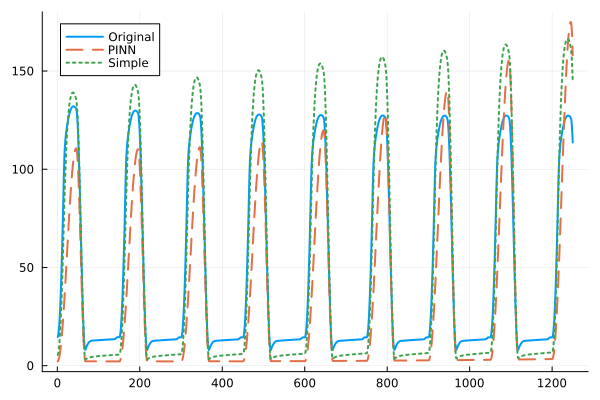

In [38]:
plot_differences(1)

In [39]:
function plot_diff_layout(filename::String)
    layout = @layout [a b c; d e f; g e f]

    p = plot(
        plot_differences(1),
        plot_differences(2),
        plot_differences(3),
        plot_differences(4),
        plot_differences(5),
        plot_differences(6),
        plot_differences(7),
        layout = layout,
        size = (1000, 800)
    )

    savefig(p, filename)
    return p
end

plot_diff_layout (generic function with 1 method)

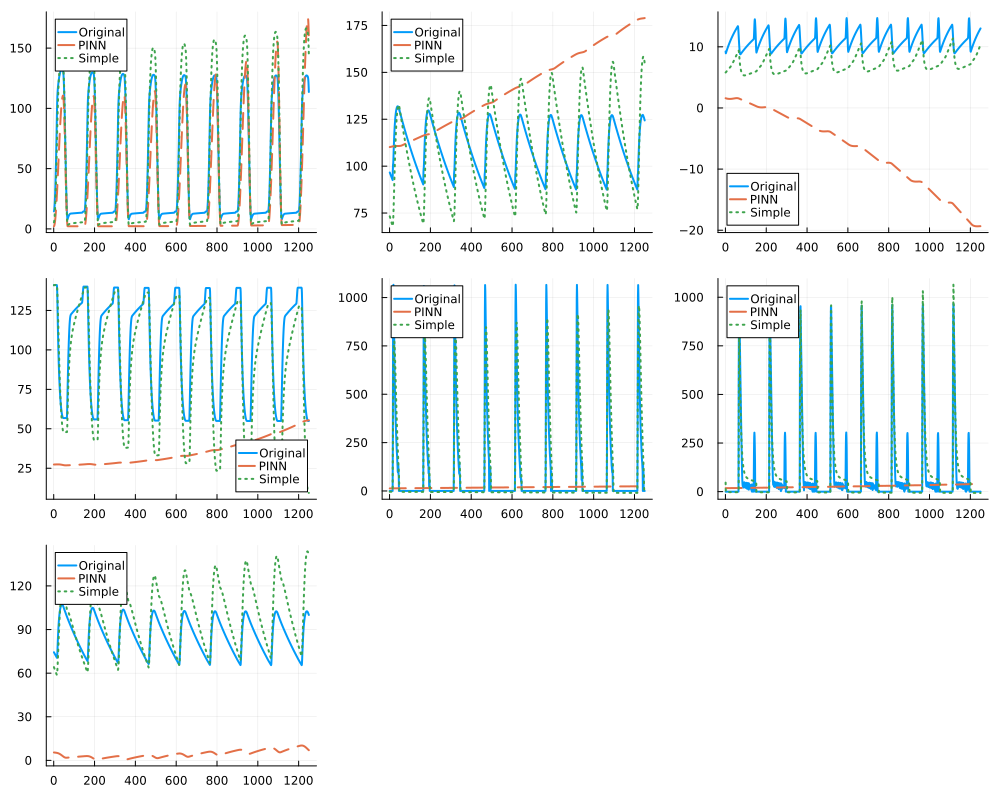

In [40]:
plot_diff_layout(PLOT_FILENAME)